<a href="https://colab.research.google.com/github/Ygrick/Data-Science/blob/main/details.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/sozykin/asozykin.ru/blob/master/_posts/2018-01-08-Transfer-Learning-in-Keras.md



# Создание

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from IPython.display import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers


In [ ]:
# подключение гугл диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# пути к датасетам и константы
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'
img_width, img_height = int(3024/10), int(4032/10)
tf.random.set_seed(30)

In [ ]:
# data_augmentation = tf.keras.Sequential([
#   layers.RandomFlip("horizontal_and_vertical", seed=30),
#   layers.RandomRotation(0.2, seed=30),
# ])

In [ ]:
# извлечение данных из датасетов
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="binary",
    class_names=['big', 'small'],
    image_size=(img_width, img_height),
    seed=30, )

test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="binary",
    class_names=['big', 'small'],
    image_size=(img_width, img_height),
    seed=30, )

Found 43 files belonging to 2 classes.
Found 21 files belonging to 2 classes.


In [ ]:
# построение модели
model = Sequential()
# model.add(data_augmentation)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(1e-5), 
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator, batch_size=20, epochs=3) # 22-3

Epoch 1/3
2/2 [==============================] - 15s 545ms/step - loss: 81.1859 - accuracy: 0.5349
Epoch 2/3
2/2 [==============================] - 5s 511ms/step - loss: 71.4914 - accuracy: 0.8140
Epoch 3/3
2/2 [==============================] - 5s 509ms/step - loss: 2.3414 - accuracy: 0.9767


In [ ]:
score = model.evaluate(test_generator)

1/1 [==============================] - 5s 5s/step - loss: 14.5805 - accuracy: 0.9048


In [ ]:
# model.save('/content/drive/MyDrive/my_model.h5')

# Использование

In [ ]:
# model_loaded = tf.keras.models.load_model('16_model')

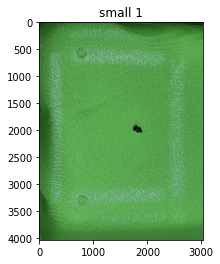

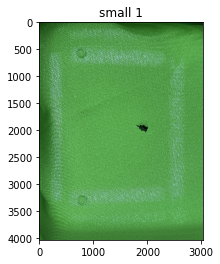

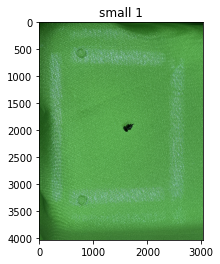

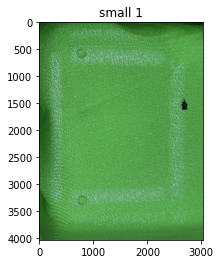

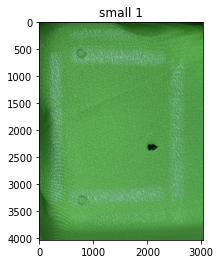

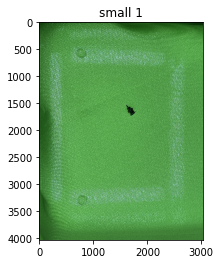

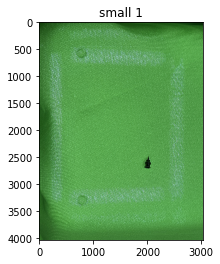

In [ ]:
# проверка классификации малых деталей
for i in range(7):

  # взятие изображения
  img = load_img(f'{test_dir}/small/IMG_{7887+i*3}.jpeg')
  img_array = img_to_array(img)

  # resize и rescale
  img_array = tf.image.resize(img_array, (img_width, img_height))
  img_array = img_array / 255.0
  img_expended = np.expand_dims(img_array, axis=0)

  # predict 
  prediction = round(float(model.predict(img_expended)))
  pred_label = 'small' if prediction == 1 else 'big'

  # отрисовка
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')

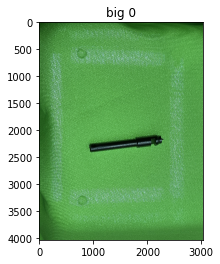

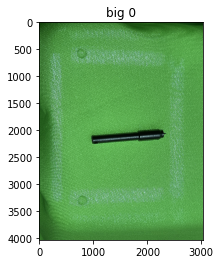

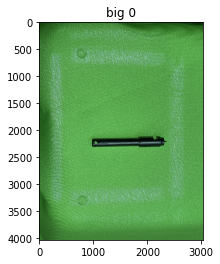

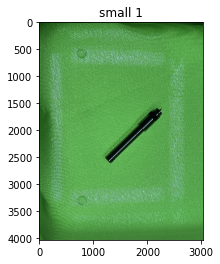

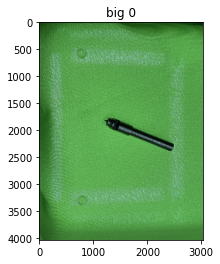

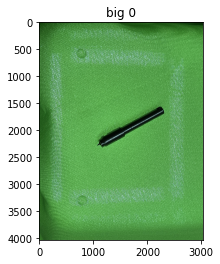

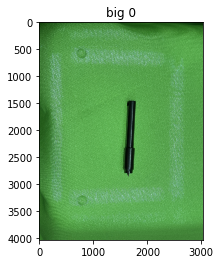

In [ ]:
# проверка классификации больших деталей
for i in range(7):
  img = load_img(f'{test_dir}/big/IMG_{7847+i*3}.jpeg')
  img_array = img_to_array(img)
  img_array = tf.image.resize(img_array, (img_width, img_height))
  img_array = img_array / 255.0
  img_expended = np.expand_dims(img_array, axis=0)
  prediction = round(float(model.predict(img_expended)))
  pred_label = 'small' if prediction == 1 else 'big'
  plt.figure()
  plt.imshow(img)
  plt.title(f'{pred_label} {prediction}')

# Попытки сохранить

In [ ]:
# from google.colab import files
# files.download('16_model')
# !zip -r /content/16_model.zip 16_model
# model.save('/content/drive/MyDrive/my_model')
# tf.saved_model.save(model, '/content/drive/MyDrive/model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/my_model/assets
